In [1]:
import json

In [4]:
results = json.load(open('results/results_0.json'))

In [8]:
results["run_params"]

{'n_steps': 10,
 'thin': 1,
 'burn_frac': 0.0,
 'bias_strength': 0.0,
 'calculation_type': 'mace_small',
 'verbose': True}

In [11]:
results["trajectory"][0].keys()

dict_keys(['structure_unrelaxed', 'Al_O_aggregation_score', 'Eu_proximity_score', 'accepted', 'energy_unrelaxed', 'energy_relaxed', 'structure_relaxed', 'energy'])

In [12]:
e_unrelaxed = []
e_relaxed = []
for step in results["trajectory"]:
    e_unrelaxed.append(step["energy_unrelaxed"])
    e_relaxed.append(step["energy_relaxed"])

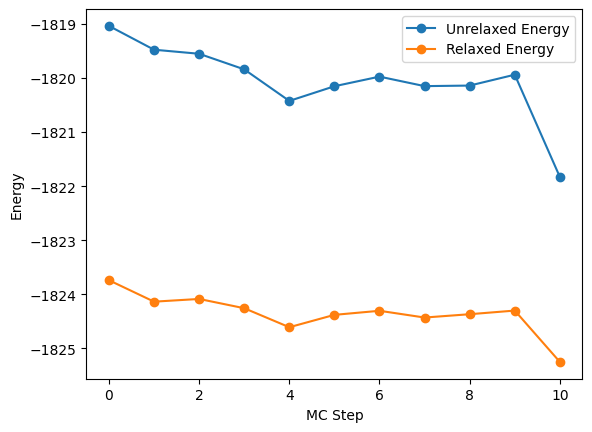

In [14]:
import matplotlib.pyplot as plt
plt.plot(e_unrelaxed, "-o", label='Unrelaxed Energy')
plt.plot(e_relaxed, "-o", label='Relaxed Energy')
plt.xlabel('MC Step')
plt.ylabel('Energy')
plt.legend()
plt.show()

[]

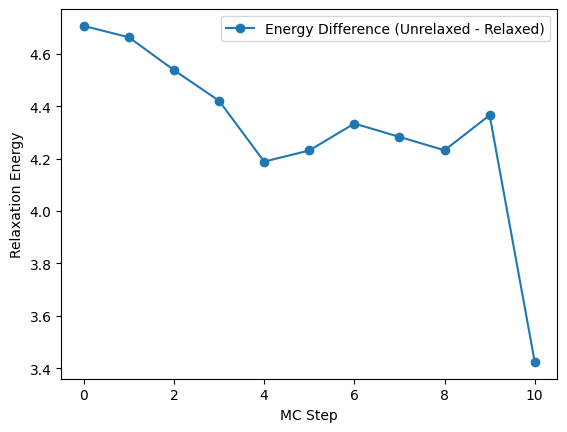

In [16]:
# Energy difference between relaxed and unrelaxed
energy_diff = [u - r for u, r in zip(e_unrelaxed, e_relaxed)]
plt.plot(energy_diff, "-o", label='Energy Difference (Unrelaxed - Relaxed)')
plt.xlabel('MC Step')
plt.ylabel('Relaxation Energy')
plt.legend()    
plt.plot()

In [17]:
# Is the structure ranking preserved after relaxation?
import numpy as np
ranks_unrelaxed = np.argsort(e_unrelaxed)
ranks_relaxed = np.argsort(e_relaxed)   

In [20]:
# Average relaxation energy gain
avg_relaxation = np.mean([u - r for u, r in zip(e_unrelaxed, e_relaxed)])
print(f"Average relaxation energy: {avg_relaxation:.3f} eV")

# Relative to energy differences between configurations
energy_range = max(e_unrelaxed) - min(e_unrelaxed)
print(f"Relaxation/Range ratio: {avg_relaxation/energy_range:.2%}")

Average relaxation energy: 4.308 eV
Relaxation/Range ratio: 154.11%


In [21]:
# Spearman rank correlation
from scipy.stats import spearmanr
correlation, p_value = spearmanr(e_unrelaxed, e_relaxed)
print(f"Rank correlation: {correlation:.3f} (p={p_value:.3e})")

# Percentage of rank changes
rank_changes = np.sum(ranks_unrelaxed != ranks_relaxed) / len(ranks_unrelaxed)
print(f"Configurations changing rank: {rank_changes:.1%}")

Rank correlation: 0.982 (p=8.403e-08)
Configurations changing rank: 36.4%
